In [1]:
import pandas as pd

In [2]:
data = pd.DataFrame()
for o in [1, 4, 8]:   
    file = f"OC_fourrooms_12_RouteSpec_3steps_{o}opt.csv"
    tmp = pd.read_csv(file)
    print(tmp.shape)
    data[f"Wall time {o}"] = tmp["Wall time"]
    data[f"Step {o}"] = tmp["Step"]
    data[f"Value {o}"] = tmp["Value"]
    data[f"mean_value {o}"] = [tmp["Value"][(i-100 if i > 100 else 0):i].mean() for i in range(tmp["Value"].shape[0])]

(1000, 3)
(1000, 3)
(1000, 3)


In [3]:
data.head()

,Wall time 1,Step 1,Value 1,mean_value 1,Wall time 4,Step 4,Value 4,mean_value 4,Wall time 8,Step 8,Value 8,mean_value 8
0,1.689574e+09,4,300.0,NaN,1.689584e+09,4,1797.0,NaN,1.689584e+09,4,2127.0,NaN
1,1.689574e+09,5,1259.0,300.000000,1.689584e+09,5,907.0,1797.000000,1.689584e+09,5,1095.0,2127.00
2,1.689574e+09,11,26.0,779.500000,1.689584e+09,11,966.0,1352.000000,1.689585e+09,11,906.0,1611.00
3,1.689574e+09,15,19.0,528.333333,1.689584e+09,15,1909.0,1223.333333,1.689585e+09,15,2881.0,1376.00
4,1.689574e+09,16,20.0,401.000000,1.689584e+09,16,168.0,1394.750000,1.689585e+09,16,1943.0,1752.25


<Axes: >

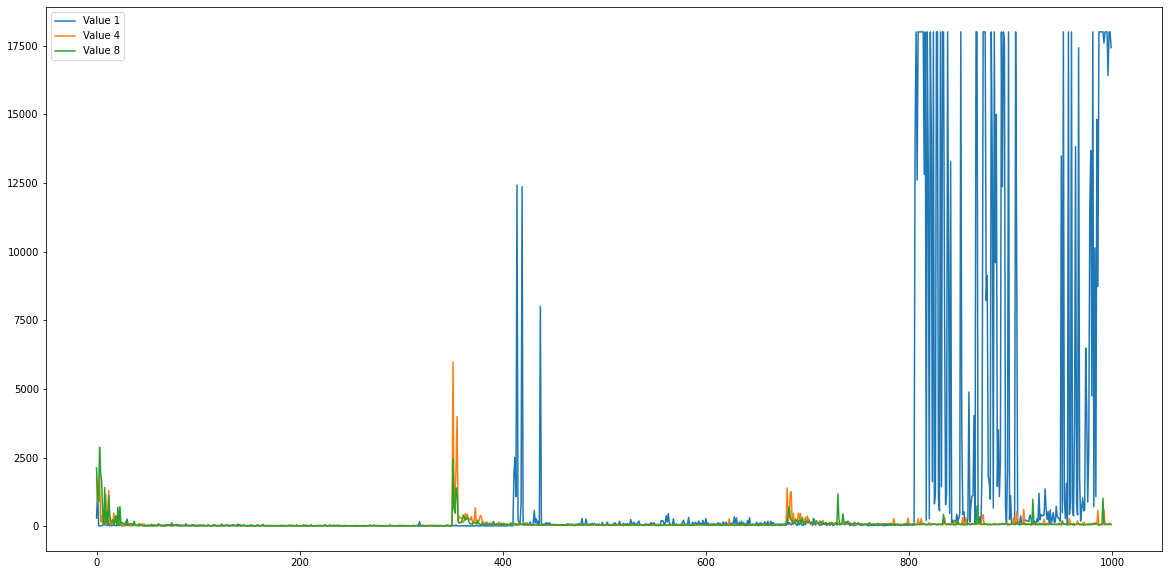

In [4]:
data[["Value 1", "Value 4", "Value 8"]].plot(figsize=(20, 10))

<Axes: >

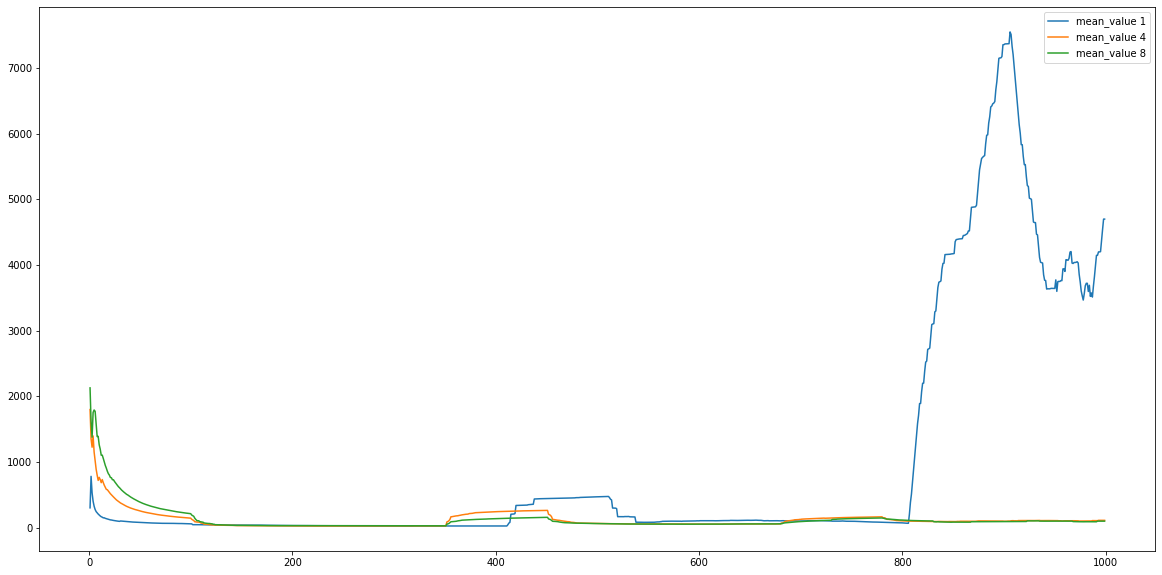

In [5]:
data[["mean_value 1", "mean_value 4", "mean_value 8"]].plot(figsize=(20, 10))

In [6]:
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

for o in [1,4,8]:
    data[f"Smooth {o}"] = smooth(data[f"Value {o}"], .99)

<Axes: >

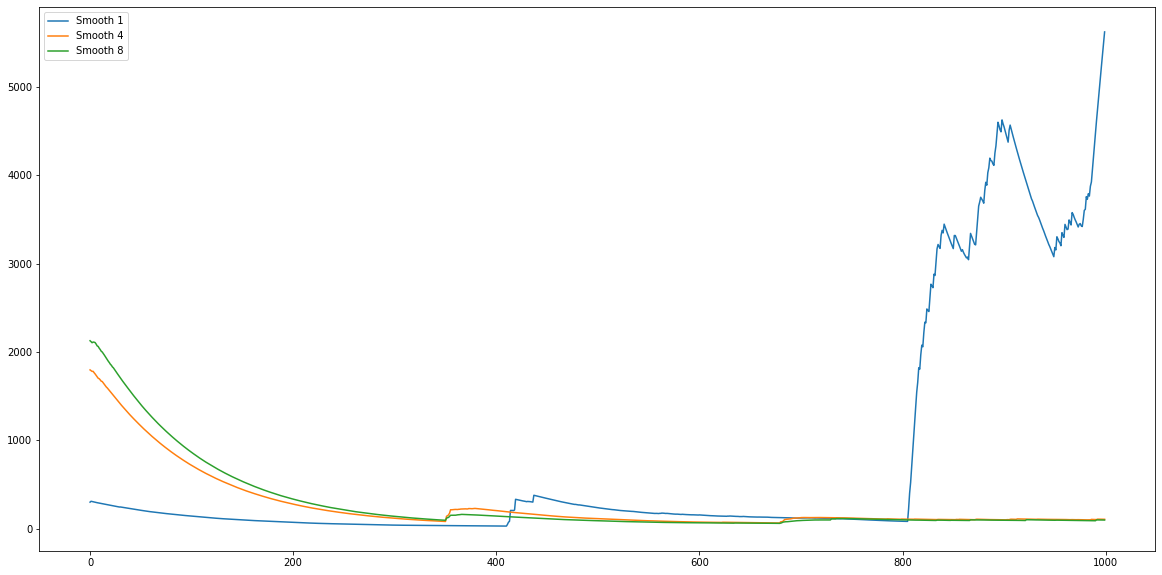

In [7]:
data[["Smooth 1", "Smooth 4", "Smooth 8"]].plot(figsize=(20, 10))

In [10]:
sapiento_data = pd.read_csv("sapiento_logs2.csv")

In [12]:
sapiento_data.shape

(20000, 13)

In [13]:
sapiento_data.columns

Index(['episode', 'env.name: sapientino - _step',
       'env.name: sapientino - _step__MIN',
       'env.name: sapientino - _step__MAX', 'env.name: sapientino - reward',
       'env.name: sapientino - reward__MIN',
       'env.name: sapientino - reward__MAX',
       'env.name: Sarsa-Sapientino3C-1 - _step',
       'env.name: Sarsa-Sapientino3C-1 - _step__MIN',
       'env.name: Sarsa-Sapientino3C-1 - _step__MAX',
       'env.name: Sarsa-Sapientino3C-1 - reward',
       'env.name: Sarsa-Sapientino3C-1 - reward__MIN',
       'env.name: Sarsa-Sapientino3C-1 - reward__MAX'],
      dtype='object')

<Axes: >

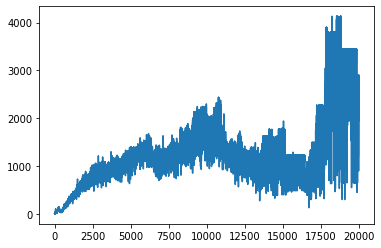

In [15]:
sapiento_data["env.name: sapientino - reward"].plot()

<Axes: >

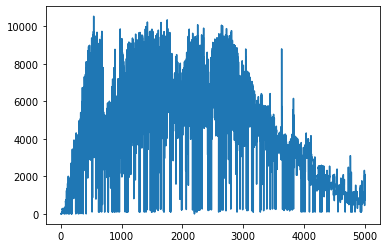

In [16]:
sapiento_data["env.name: Sarsa-Sapientino3C-1 - reward"].plot()